Data Science internship project by Avani Shah
batch 5

In [1]:
!pip install numpy>=1.20


In [2]:
# import libraies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import dump, load
import pickle


In [3]:
import numpy
import matplotlib

In [4]:
# Load and clean the data
order_data = pd.read_csv(r"C:\Users\avani\Downloads\Order.tsv", sep='\t')
order_breakdown_data = pd.read_json(r"C:\Users\avani\Downloads\Order_breakdown.json")
merged_data = pd.merge(order_data, order_breakdown_data, on='Order ID')

In [5]:
merged_data.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [6]:
merged_data.to_csv(r"C:\Users\avani\Downloads\merged_data.csv")

In [7]:
merged_data.shape

(8047, 19)

In [8]:
# Summary statistics for the data
merged_data.describe()


,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4.007332,0.110047,29.793078,291.845657,35.198211,3.772089
std,1.741232,0.181773,88.817656,485.212156,178.125844,2.203369
min,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,3.000000,0.000000,0.000000,48.000000,1.000000,2.000000
50%,4.000000,0.000000,0.000000,117.000000,14.000000,3.000000
75%,5.000000,0.100000,22.000000,313.000000,47.000000,5.000000
max,7.000000,0.850000,1700.000000,6517.000000,2476.000000,14.000000


In [9]:
merged_data.dtypes

Order ID            object
Order Date          object
Customer Name       object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Ship Mode           object
State               object
Days to Ship         int64
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Profit               int64
Quantity             int64
Category            object
Sub-Category        object
dtype: object

In [10]:
print(merged_data.isnull().sum())

Order ID           0
Order Date         0
Customer Name      0
City               0
Country            0
Region             0
Segment            0
Ship Date          0
Ship Mode          0
State              0
Days to Ship       0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64


In [11]:
merged_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8042    False
8043    False
8044    False
8045    False
8046    False
Length: 8047, dtype: bool

In [12]:
merged_data = merged_data.drop_duplicates()

In [13]:
merged_data.shape

(8045, 19)

In [14]:
merged_data.info

<bound method DataFrame.info of              Order ID Order Date        Customer Name        City  \
0     BN-2011-7407039     1-1-13           Ruby Patel   Stockholm   
1     AZ-2011-9050313     1-3-13       Summer Hayward   Southport   
2     AZ-2011-6674300     1-4-13     Devin Huddleston     Valence   
3     BN-2011-2819714     1-4-13          Mary Parker  Birmingham   
4     BN-2011-2819714     1-4-13          Mary Parker  Birmingham   
...               ...        ...                  ...         ...   
8042  AZ-2014-1412225   12-31-16          Leon Barnes   Worcester   
8043  AZ-2014-7604524   12-31-16  Rebecca Chamberlain     Hamburg   
8044  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   
8045  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   
8046  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   

             Country   Region      Segment Ship Date     Ship Mode  \
0             Sweden    North  Home Office    1-5-13  Economy Plus   

In [15]:
merged_data.describe

<bound method NDFrame.describe of              Order ID Order Date        Customer Name        City  \
0     BN-2011-7407039     1-1-13           Ruby Patel   Stockholm   
1     AZ-2011-9050313     1-3-13       Summer Hayward   Southport   
2     AZ-2011-6674300     1-4-13     Devin Huddleston     Valence   
3     BN-2011-2819714     1-4-13          Mary Parker  Birmingham   
4     BN-2011-2819714     1-4-13          Mary Parker  Birmingham   
...               ...        ...                  ...         ...   
8042  AZ-2014-1412225   12-31-16          Leon Barnes   Worcester   
8043  AZ-2014-7604524   12-31-16  Rebecca Chamberlain     Hamburg   
8044  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   
8045  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   
8046  BN-2014-4140795   12-31-16      Daniel Hamilton   Eindhoven   

             Country   Region      Segment Ship Date     Ship Mode  \
0             Sweden    North  Home Office    1-5-13  Economy Plus 

In [17]:
merged_data.corr()

,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
Days to Ship,1.000000,0.017547,-0.018932,-0.004393,0.014172,0.001623
Discount,0.017547,1.000000,0.426090,-0.026424,-0.351359,0.003633
Actual Discount,-0.018932,0.426090,1.000000,0.478885,-0.395889,0.207130
Sales,-0.004393,-0.026424,0.478885,1.000000,0.441218,0.353415
Profit,0.014172,-0.351359,-0.395889,0.441218,1.000000,0.098664
Quantity,0.001623,0.003633,0.207130,0.353415,0.098664,1.000000


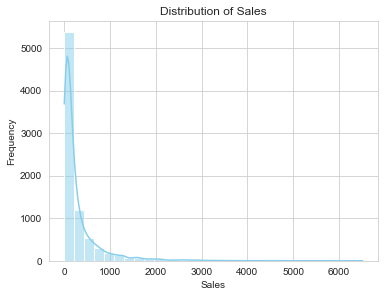

In [18]:
# Set up the matplotlib figure size and style for the visualizations
plt.figure(figsize=(20, 15))
sns.set_style("whitegrid")

# 1. Distribution of Sales
plt.subplot(3, 3, 1)
sns.histplot(merged_data['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

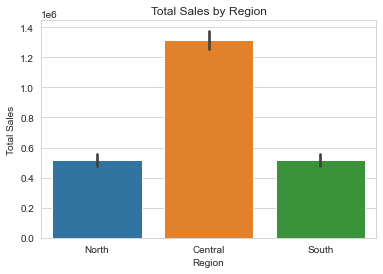

In [19]:
# 2. Total Sales by Region
sns.barplot(x=merged_data['Region'], y=merged_data['Sales'], estimator=sum)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.show()

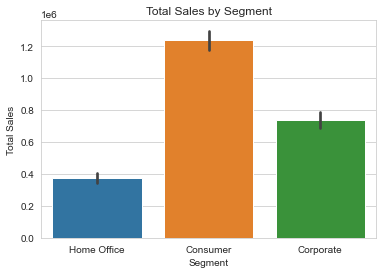

In [20]:
# 3. Total Sales by Segment

sns.barplot(x=merged_data['Segment'], y=merged_data['Sales'], estimator=sum)
plt.title('Total Sales by Segment')
plt.ylabel('Total Sales')
plt.show()

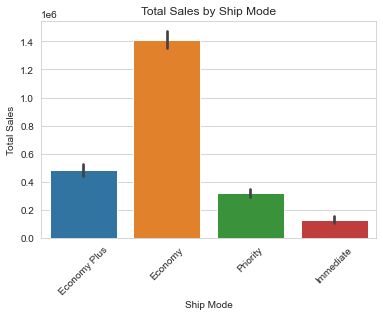

In [21]:
# 4. Total Sales by Ship Mode
sns.barplot(x=merged_data['Ship Mode'], y=merged_data['Sales'], estimator=sum)
plt.title('Total Sales by Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

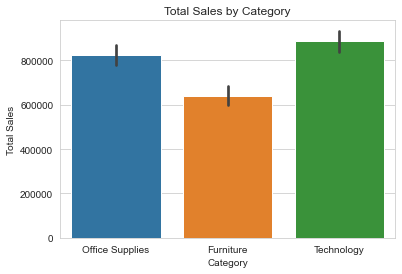

In [22]:
# 5. Total Sales by Category
sns.barplot(x=merged_data['Category'], y=merged_data['Sales'], estimator=sum)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()

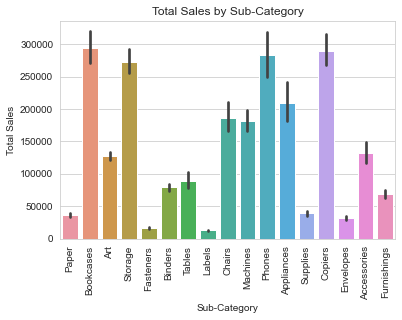

In [23]:
# 6. Total Sales by Sub-Category
sns.barplot(x=merged_data['Sub-Category'], y=merged_data['Sales'], estimator=sum)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()



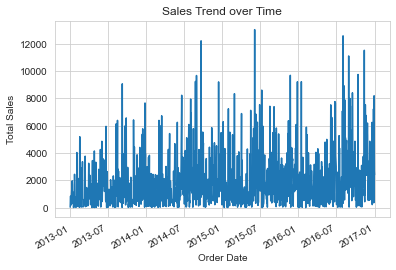

In [24]:
# 7. Sales Trend over Time (based on Order Date)
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
merged_data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Trend over Time')
plt.ylabel('Total Sales')
plt.show()

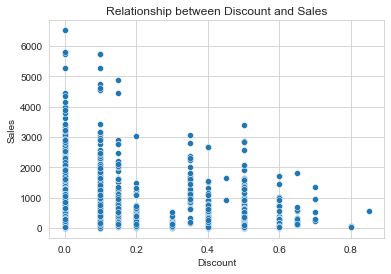

In [25]:
# 8. Relationship between Discount and Sales
sns.scatterplot(x=merged_data['Discount'], y=merged_data['Sales'])
plt.title('Relationship between Discount and Sales')
plt.show()


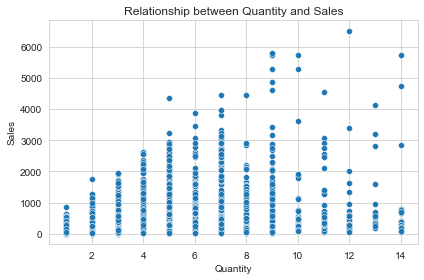

In [26]:
# 9. Relationship between Quantity and Sales
sns.scatterplot(x=merged_data['Quantity'], y=merged_data['Sales'])
plt.title('Relationship between Quantity and Sales')

plt.tight_layout()
plt.show()


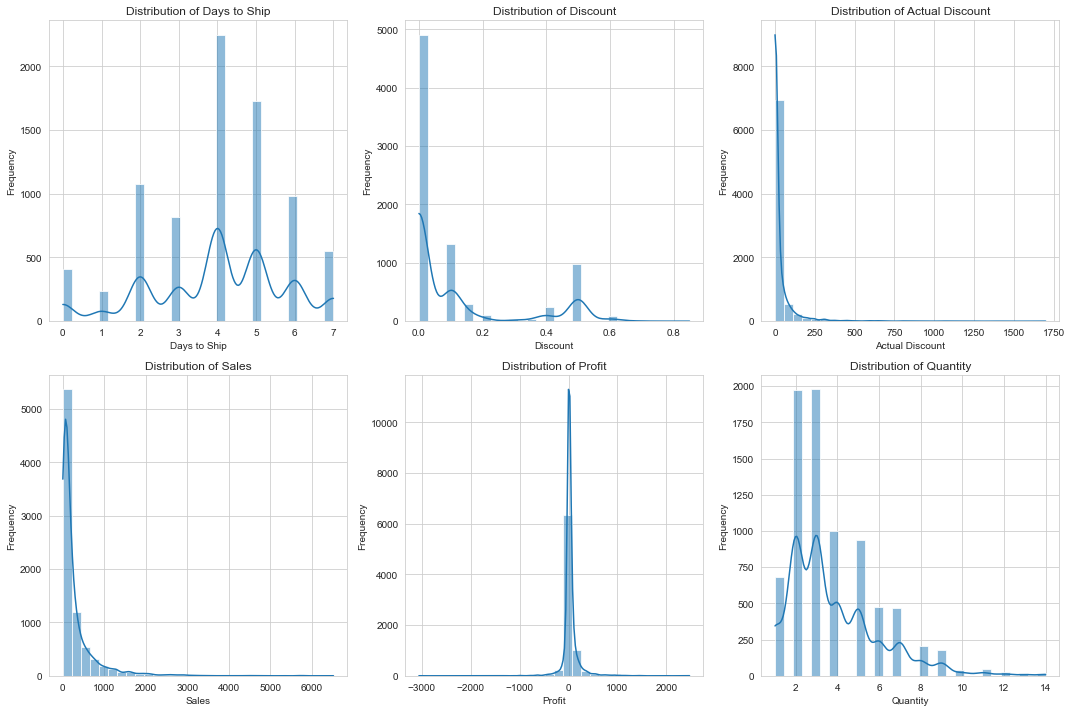

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Univariate Analysis

# Plotting the distribution for some selected columns
columns_to_plot = ['Days to Ship', 'Discount', 'Actual Discount', 'Sales', 'Profit', 'Quantity']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
merged_data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

In [29]:
# Identify numeric columns
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['Days to Ship', 'Discount', 'Actual Discount', 'Sales', 'Profit', 'Quantity']
Categorical Columns: ['Order ID', 'Customer Name', 'City', 'Country', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State', 'Product Name', 'Category', 'Sub-Category']


In [80]:
# Handle categorical variables using one-hot encoding
# Define the categorical columns
categorical_colus =['City', 'Country', 'Region', 'Segment', 'Ship Mode', 'State', 'Category', 'Sub-Category','Product Name']




In [81]:

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_colus)
    ]
)

# Create the pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Optionally, you can add a StandardScaler for feature scaling
    ('regressor', RandomForestRegressor())
])

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
# Handle scaling of numerical features
numerical_cols = ['Days to Ship', 'Discount', 'Actual Discount', 'Sales', 'Profit', 'Quantity']
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(merged_data[numerical_cols])
scaled_data = pd.DataFrame(scaled_cols, columns=numerical_cols)



In [36]:
merged_data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category'],
      dtype='object')

In [37]:
# Create the column transformer
transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_colus)], remainder='passthrough')

In [38]:
columns_to_drop =['Order ID', 'Order Date', 'Customer Name', 'Discount', 'Sales', 'Profit','Ship Date', 'Days to Ship']

In [83]:
merged_data.drop(columns_to_drop , axis=1).head()

,City,Country,Region,Segment,Ship Mode,State,Product Name,Actual Discount,Quantity,Category,Sub-Category
0,Stockholm,Sweden,North,Home Office,Economy Plus,Stockholm,"Enermax Note Cards, Premium",22.5,3,Office Supplies,Paper
1,Southport,United Kingdom,North,Consumer,Economy,England,"Dania Corner Shelving, Traditional",0.0,7,Furniture,Bookcases
2,Valence,France,Central,Consumer,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.0,3,Office Supplies,Art
3,Birmingham,United Kingdom,North,Corporate,Economy,England,"Boston Markers, Easy-Erase",13.5,2,Office Supplies,Art
4,Birmingham,United Kingdom,North,Corporate,Economy,England,"Eldon Folders, Single Width",8.5,2,Office Supplies,Storage


In [84]:
X=merged_data.drop(columns_to_drop , axis=1)

In [85]:
# Transform the input features and target variable
y = merged_data["Sales"].values

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [88]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Country', 'Region',
                                                   'Segment', 'Ship Mode',
                                                   'State', 'Category',
                                                   'Sub-Category',
                                                   'Product Name'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('regressor', RandomForestRegressor())])

In [ ]:
X_train

In [ ]:
y_train

In [89]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

score = pipeline.score(X_train, y_train)
print(score)

# Evaluate the model on the test data (if needed)
score = pipeline.score(X_test, y_test)
print(score)

# Make predictions using the pipeline
ypred = pipeline.predict(X_test)


0.9204862991264907
0.23668061253380301


In [42]:
# Train the Random Forest model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
def mscore(model):
    print('Training Score',model.score(X_train,y_train))  # Training accuracy
    print('Testing Score',model.score(X_test,y_test))     # testing accuracy

In [44]:
mscore(regressor)

Training Score 0.9577943512280549
Testing Score 0.7542733462620601


In [45]:
y_pred_random_forest =regressor.predict(X_test)

In [46]:
mse_rf = mean_squared_error(y_test, y_pred_random_forest)
r2_rf = r2_score(y_test, y_pred_random_forest)

In [47]:
print("Random Forest Regression:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("")

Random Forest Regression:
Mean Squared Error: 45382.658648974524
R-squared: 0.7542733462620601



In [48]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred_regression = lr.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

In [51]:
# Print evaluation metrics for regression models
print("Linear Regression:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("")


Linear Regression:
Mean Squared Error: 103452.90082359721
R-squared: 0.43984914291838373



In [52]:
mscore(lr)

Training Score 0.8621556679533199
Testing Score 0.43984914291838373


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [54]:
XGBoost= XGBRegressor()
XGBoost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
mscore(XGBoost)

In [ ]:
y_pred_xg =XGBoost.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)

In [ ]:
# Print evaluation metrics for regression models
print("XGBoost:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("")


In [ ]:
# Save the transformer and regressor as a pipeline
pipeline = (transformer, regressor)
with open('sale_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
# Load the trained pipeline
with open('sale_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [ ]:
# Create a new dataset with 20 random data points
new_dataset = merged_data.sample(n=20, random_state=42)


In [ ]:
# Apply the saved model to predict the target column for the new dataset
new_data = new_dataset.drop("Sales", axis=1)

In [ ]:
new_data.to_csv(r"C:\Users\avani\Downloads\sample_submission.csv")

In [ ]:
sample = pd.read_csv(r"C:\Users\avani\Downloads\sample_submission.csv")
sample.shape

In [ ]:
sample.head()

In [ ]:
sample = sample.drop("Unnamed: 0", axis=1)

In [ ]:
# Transform the new data using the loaded transformer
X_new = transformer.transform(new_data)

In [ ]:
# Make predictions using the regressor model
predictions = regressor.predict(X_new)
print(predictions)

In [ ]:
#  Compare the actual data and predicted data
new_data_with_predictions = new_dataset.copy()
new_data_with_predictions["predicted_sales"] = predictions
new_data_with_predictions['predicted_sales'] = new_data_with_predictions['predicted_sales'].apply(lambda x: '{:.0f}'.format(x))

# Print the actual and predicted data
print("Actual Data and Predicted Data:")
new_data_with_predictions[["Sales", "predicted_sales"]]


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:


# Make a prediction using the loaded model on the first entry of the test set
sample_input = X_test_scaled[0].reshape(1, -1)
loaded_model_prediction = loaded_rf_model.predict(sample_input)

loaded_model_prediction[0]
# Randomly sample 20 data points from the original dataset
sample_data = encoded_data.sample(n=20, random_state=42)




In [77]:
from joblib import dump

dump(pipeline, 'sale_pipeline.joblib')


['sale_pipeline.joblib']

In [ ]:
df1=df.sample(20)
df1

In [ ]:
df1.shape

In [ ]:
df1.to_csv('sample_submission_sales.csv', index=False)

In [ ]:
df2=pd.read_csv("sample_submission_sales.csv")
df2.head()

In [ ]:
df2.shape
df.head()
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numeric features
df[num_col] = scaler.fit_transform(df[num_col])
# Convert categorical variables into numerical representation (e.g., one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# dropping selling_price column
df2.drop("Sales",axis=1,inplace=True)

In [ ]:
regressor.predict(df2)